# Decision tree and Random Forest

In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("datatraining.txt", sep=",")
test_data = pd.read_csv("datatest.txt", sep=",")

From https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.


## Attribute Information:

date time year-month-day hour:minute:second

Temperature, in Celsius

Relative Humidity, %

Light, in Lux

CO2, in ppm

Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air

Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status



In [4]:
train_data.sample(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2291,2015-02-06 08:00:59,20.426667,19.163333,413.0,504.000000,0.002838,1
2193,2015-02-06 06:23:00,20.200000,18.700000,0.0,426.000000,0.002730,0
7642,2015-02-10 01:12:00,20.290000,32.900000,0.0,469.000000,0.004846,0
4992,2015-02-08 05:02:00,19.290000,31.600000,0.0,437.333333,0.004371,0
2033,2015-02-06 03:42:59,20.500000,18.945000,0.0,437.000000,0.002818,0


In [5]:
print(train_data.shape)

(8143, 7)


In [6]:
train_data = train_data.drop(['date'], axis = 1)
test_data = test_data.drop(['date'], axis = 1)

In [7]:
train_data.sample(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
5137,19.05,31.445000,0.000000,436.000000,0.004285,0
4823,19.39,30.700000,0.000000,440.500000,0.004273,0
6433,19.39,26.790000,0.000000,462.500000,0.003725,0
844,20.89,23.323333,398.333333,527.000000,0.003558,1
5386,19.10,30.890000,6.000000,434.333333,0.004222,0


In [8]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

criterion='gini'

max_depth=None


min_samples_leafint or float, default=1



## Decision Tree with Entropy criterion

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


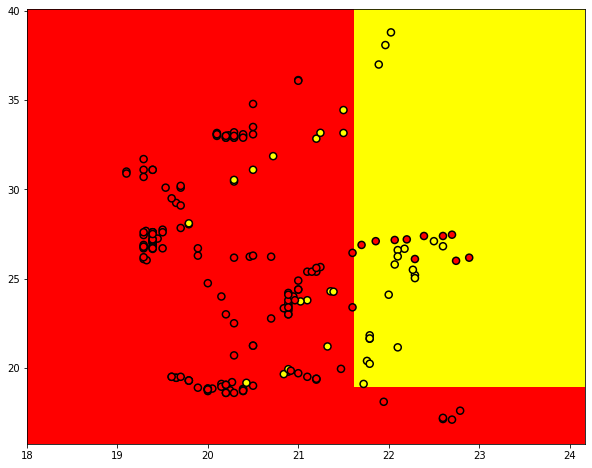

In [9]:
tree = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
exp1_data_train = train_data[['Temperature','Humidity']]
exp1_data_labels = train_data['Occupancy']
tree.fit(exp1_data_train, exp1_data_labels)


x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

In [10]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

exp1_data_test = test_data[['Temperature','Humidity']]
exp1_data_tlabels = test_data['Occupancy']

prediction = tree.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

0.8570356472795497
0.7965830218900161
0.8379681282647745


In [11]:
tree.classes_

array([0, 1])

In [12]:
tree.feature_importances_

array([0.83617275, 0.16382725])

In [13]:
tree.max_features_

2

In [14]:
tree.n_classes_

2

In [15]:
tree.n_features_in_

2

In [16]:
tree.n_outputs_

1

## Decision Tree with Gini criterion

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


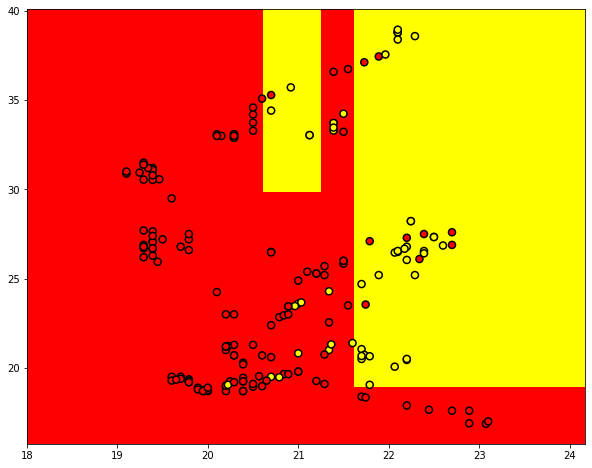

In [17]:
new_tree = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
exp1_data_train = train_data[['Temperature','Humidity']]
exp1_data_labels = train_data['Occupancy']
new_tree.fit(exp1_data_train, exp1_data_labels)


x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = new_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)
plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

In [18]:
exp2_data_test = test_data[['Temperature','Humidity']]
exp2_data_tlabels = test_data['Occupancy']

prediction = new_tree.predict(exp2_data_test)

print(accuracy_score(exp2_data_tlabels, prediction))
print(f1_score(exp2_data_tlabels, prediction))
print(roc_auc_score(exp2_data_tlabels, prediction))

0.8570356472795497
0.7965830218900161
0.8379681282647745


# Full data training

In [19]:
one_more_tree = DecisionTreeClassifier(max_depth=3)
one_more_tree.fit(train_data.drop(['Occupancy'], axis=1), train_data['Occupancy'])

exp3_data_test = test_data.drop(['Occupancy'], axis=1)
exp3_data_tlabels = test_data['Occupancy']

prediction = one_more_tree.predict(exp3_data_test)

print(accuracy_score(exp3_data_tlabels, prediction))
print(f1_score(exp3_data_tlabels, prediction))
print(roc_auc_score(exp3_data_tlabels, prediction))


0.9782363977485928
0.9708835341365462
0.9817752960021779


In [20]:
one_more_tree.feature_importances_

array([0.00596696, 0.00155096, 0.98612782, 0.00635426, 0.        ])

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

From https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]



n_estimators int, default=100
The number of trees in the forest

criterion='gini'

max_depth=None

bootstrap=True

n_jobs=None

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


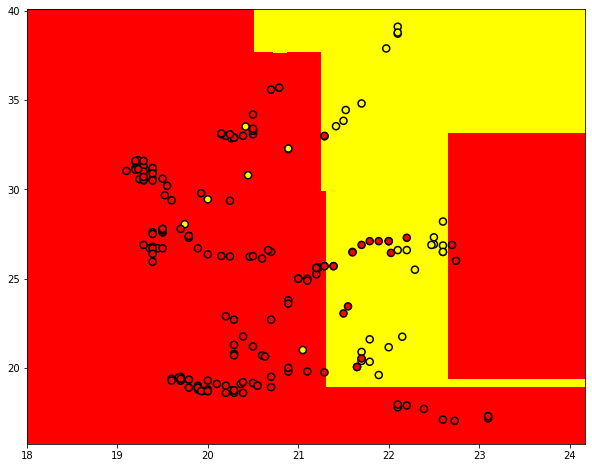

In [22]:
rf = RandomForestClassifier(n_estimators=5, max_depth=3, criterion='entropy', random_state=42)
exp1_data_train = train_data[['Temperature','Humidity']]
exp1_data_labels = train_data['Occupancy']
rf.fit(exp1_data_train, exp1_data_labels)


x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

In [23]:
exp1_data_test = test_data[['Temperature','Humidity']]
exp1_data_tlabels = test_data['Occupancy']

prediction = rf.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

0.6679174484052532
0.3934201507882111
0.5885669994336398


### Entropy

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.851782363977486
0.7875201721355569
0.8307664821742395


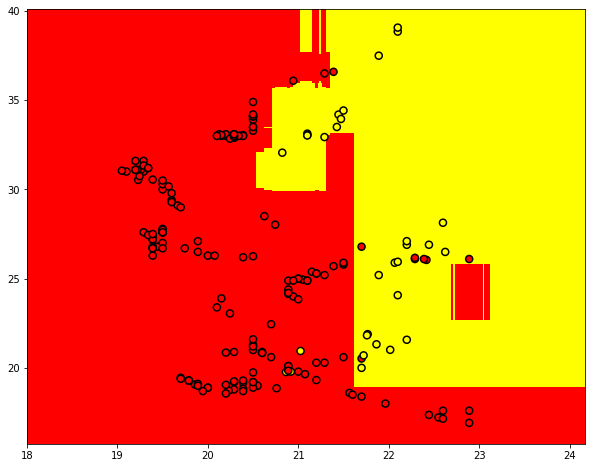

In [24]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, criterion='entropy', random_state=42)
exp1_data_train = train_data[['Temperature','Humidity']]
exp1_data_labels = train_data['Occupancy']
rf.fit(exp1_data_train, exp1_data_labels)


x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

exp1_data_test = test_data[['Temperature','Humidity']]
exp1_data_tlabels = test_data['Occupancy']

prediction = rf.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

### Gini

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8345215759849907
0.7567567567567568
0.8071039307339104


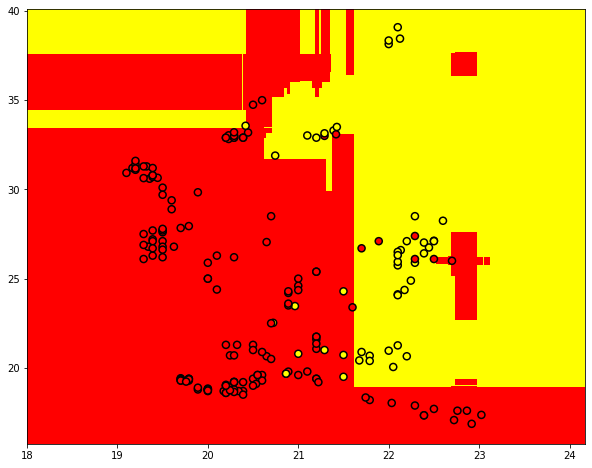

In [25]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, criterion='gini', random_state=42)
exp1_data_train = train_data[['Temperature','Humidity']]
exp1_data_labels = train_data['Occupancy']
rf.fit(exp1_data_train, exp1_data_labels)


x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

exp1_data_test = test_data[['Temperature','Humidity']]
exp1_data_tlabels = test_data['Occupancy']

prediction = rf.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.7763602251407129
0.6405307599517491
0.7273714204458446


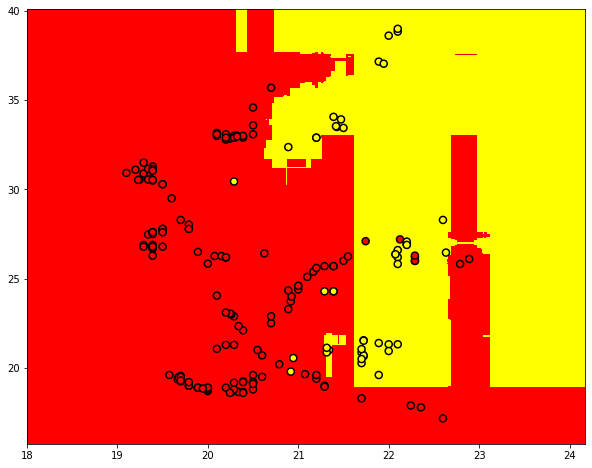

In [26]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='gini', random_state=42)
exp1_data_train = train_data[['Temperature','Humidity']]
exp1_data_labels = train_data['Occupancy']
rf.fit(exp1_data_train, exp1_data_labels)


x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

exp1_data_test = test_data[['Temperature','Humidity']]
exp1_data_tlabels = test_data['Occupancy']

prediction = rf.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

In [27]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='gini', random_state=42)
exp1_data_train = train_data.drop(['Occupancy'], axis=1)
exp1_data_labels = train_data['Occupancy']

exp1_data_test = test_data.drop(['Occupancy'], axis=1)
rf.fit(exp1_data_train, exp1_data_labels)


prediction = rf.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))


0.9606003752345216
0.9459598558929492
0.9573792717045982


# OOB score

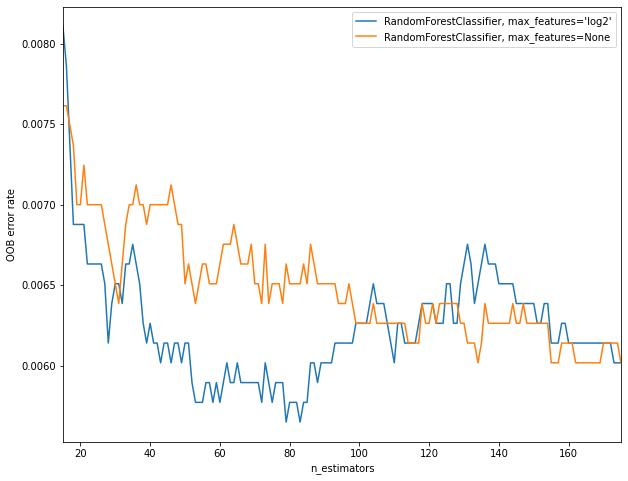

In [28]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

from collections import OrderedDict
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')


exp_data_train = train_data.drop(['Occupancy'], axis=1)
exp_data_tlabels = train_data['Occupancy']


ensemble_clfs = [
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, random_state=42)) ]


error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(exp_data_train, exp_data_tlabels)

        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# HomeWork

In [128]:
import numpy as np
import copy

def gini_criterion(y):
  classes = np.unique(y)
  res = 1.0;
  for y_k in classes:
    filt = (y == y_k)
    p_k = np.sum(filt.astype('float')) / len(y)
    res -= p_k ** 2
  return res

def entropy(y):
  classes = np.unique(y)
  res = 0;
  for y_k in classes:
    filt = (y == y_k)
    p_k = np.sum(filt.astype('float')) / len(y)
    res += - p_k * np.log(p_k)
  return res

class BinNode():
  def __init__(self, index=None, value=None, left=None, right=None):
    self.index = index
    self.value = value
    self.left = left
    self.right = right

class DecisionTree():
  def __init__(self, min_samples_split=2, max_depth=2, criterion=gini_criterion):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.criterion = criterion
    self.root = None

  def fit(self, X, y):
    self.root = self.build_tree(X, y)
    return self

  def build_tree(self, X, y, curr_depth=0):
    num_samples, num_features = np.shape(X)

    if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:

      best_split = self.get_best_split(X, y, num_samples, num_features)

      left_subtree = self.build_tree(best_split["X_l"], best_split["y_l"], curr_depth=curr_depth+1)
      right_subtree = self.build_tree(best_split["X_r"], best_split["y_r"], curr_depth=curr_depth+1)

      return BinNode(best_split["index"], best_split["threshold"], left_subtree, right_subtree)

    value = np.mean(y);
    return BinNode(value=value)

  def get_best_split(self, X, y, num_samples, num_features):

    best_split = {}

    max_gain = -float("inf")

    y_crit = self.criterion(y)

    for index in range(num_features):

      values = np.unique(X[:, index])

      for val in values:
        
        filt = X[:, index] <= val;
        left_y = y[filt]
        right_y = y[~filt]

        if len(left_y) > 0 and len(right_y) > 0:

          weight_l = len(left_y)/len(y)
          weight_r = len(right_y)/len(y)

          gain = y_crit - weight_l * self.criterion(left_y) - weight_r * self.criterion(right_y)

          if gain > max_gain:
            max_gain = gain
            best_split["index"] = index
            best_split["threshold"] = val
            best_split["X_l"] = X[filt, :]
            best_split["y_l"] = y[filt]
            best_split["X_r"] = X[~filt, :]
            best_split["y_r"] = y[~filt]

    return best_split


  def predict_proba(self, X):
    return np.array([self.make_prediction(x, self.root) for x in X])

  def make_prediction(self, x, node):
    if node.left != None:
      flag = x[node.index] <= node.value

      if flag:
        return self.make_prediction(x, node.left) 
      else:
        return self.make_prediction(x, node.right)
    else:
      return node.value

In [132]:
myTree = DecisionTree(min_samples_split = 3, max_depth = 9)
myTree = myTree.fit(train_data.drop(['Occupancy'], axis=1).to_numpy(),train_data['Occupancy'].to_numpy())
my_pred = myTree.predict_proba(test_data.drop(['Occupancy'], axis=1).to_numpy())

In [134]:
from sklearn import metrics 

y_test = test_data['Occupancy'].to_numpy()
my_pred = np.round(myTree.predict_proba(test_data.drop(['Occupancy'], axis=1).to_numpy()))

print(metrics.classification_report(y_test, my_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1693
           1       0.93      0.76      0.84       972

    accuracy                           0.89      2665
   macro avg       0.91      0.87      0.88      2665
weighted avg       0.90      0.89      0.89      2665

